## Modelagem do problema

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_train.csv')
y_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_train.csv').squeeze()
X_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_test.csv')
y_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_test.csv').squeeze()

In [22]:
print(f"X pronto: {X_train.shape[1]} colunas e {X_train.shape[0]} linhas.")
print(f"y pronto: {y_train.shape[0]} alvos.")

X pronto: 25 colunas e 9209 linhas.
y pronto: 9209 alvos.


In [23]:
print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste Final: {X_test.shape}")
print(f"Tamanho do y Treino: {y_train.shape}")

Tamanho do Treino: (9209, 25)
Tamanho do Teste Final: (2303, 25)
Tamanho do y Treino: (9209,)


### Random Forest (com a coluna SOPRO)

In [24]:
rf_model = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,         
    random_state=42,
    n_jobs=-1               
)

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
print("\nIniciando Cross-Validation (5-Folds)...")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"\nResultados por Fold: {cv_scores}")
print(f"Acurácia Média: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: +/- {cv_scores.std():.4f}")

print("\nTreinando modelo final para teste no Hold-Out...")
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\n--- Relatório Final no Conjunto de Teste ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Iniciando Cross-Validation (5-Folds)...

Resultados por Fold: [0.89739414 0.89142237 0.89522258 0.90445168 0.89842477]
Acurácia Média: 0.8974
Desvio Padrão: +/- 0.0043

Treinando modelo final para teste no Hold-Out...

--- Relatório Final no Conjunto de Teste ---
              precision    recall  f1-score   support

      Normal       0.90      0.93      0.91      1316
     Anormal       0.90      0.87      0.88       987

    accuracy                           0.90      2303
   macro avg       0.90      0.90      0.90      2303
weighted avg       0.90      0.90      0.90      2303

Matriz de Confusão:
[[1218   98]
 [ 129  858]]


### Random Forest (sem a coluna SOPRO)

In [27]:
print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste Final: {X_test.shape}")
print(f"Tamanho do y Treino: {y_train.shape}")

Tamanho do Treino: (9209, 25)
Tamanho do Teste Final: (2303, 25)
Tamanho do y Treino: (9209,)


In [28]:
colunas_sopro = [col for col in X_train.columns if 'sopro' in col.lower()]

print(f"Colunas sendo removidas: {colunas_sopro}")

if 'Motivo_Sopro' in colunas_sopro:
    colunas_sopro.remove('Motivo_Sopro')

print(f"Colunas sendo removidas: {colunas_sopro}")

X_train = X_train.drop(columns=colunas_sopro)
X_test = X_test.drop(columns=colunas_sopro)

print(f"\nColunas restantes: {X_train.shape[1]}")
print(X_train.columns.tolist())

Colunas sendo removidas: ['Motivo_Sopro', 'SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']
Colunas sendo removidas: ['SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']

Colunas restantes: 20
['IDADE', 'FC_Z_Score_Proxy', 'Sintoma_Dor', 'Sintoma_Cianose', 'Sintoma_Dispn', 'Checkup_Assintomatico', 'PPA_Alterada', 'Motivo_Cirurgia', 'Motivo_Sopro', 'Motivo_Congenita', 'B2_Desdobramento_Fixo', 'B2_Hiperfonetica', 'B2_Normal', 'B2_Outro', 'B2_Unica', 'IMC_Cat_Baixo', 'IMC_Cat_Normal', 'IMC_Cat_Obesidade', 'IMC_Cat_Sobrepeso', 'FC_Z']


In [29]:
rf_model = RandomForestClassifier(
    n_estimators=500,      
    max_depth=None,        
    random_state=42,
    n_jobs=-1              
)

In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
print("\nIniciando Cross-Validation (5-Folds)...")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"\nResultados por Fold: {cv_scores}")
print(f"Acurácia Média: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: +/- {cv_scores.std():.4f}")

print("\nTreinando modelo final para teste no Hold-Out...")
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\n--- Relatório Final no Conjunto de Teste ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Iniciando Cross-Validation (5-Folds)...

Resultados por Fold: [0.64169381 0.64549403 0.65363735 0.64875136 0.63335144]
Acurácia Média: 0.6446
Desvio Padrão: +/- 0.0069

Treinando modelo final para teste no Hold-Out...

--- Relatório Final no Conjunto de Teste ---
              precision    recall  f1-score   support

      Normal       0.70      0.70      0.70      1316
     Anormal       0.61      0.60      0.61       987

    accuracy                           0.66      2303
   macro avg       0.65      0.65      0.65      2303
weighted avg       0.66      0.66      0.66      2303

Matriz de Confusão:
[[927 389]
 [390 597]]


### XGBoost (com coluna SOPRO)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Recarregando dados para garantir estado inicial (COM SOPRO)
X_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_train.csv')
y_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_train.csv').squeeze()
X_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_test.csv')
y_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_test.csv').squeeze()

print(f"Dados recarregados: {X_train.shape}")

Dados recarregados: (9209, 25)


In [41]:
# Configuração do modelo (hyperparams padrão robustos para baseline)
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nIniciando Cross-Validation (5-Folds)...")
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Resultados por Fold: {cv_scores}")
print(f"Acurácia Média: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("\nTreinando modelo final para teste no Hold-Out...")
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("\n--- Relatório Final no Conjunto de Teste (XGBoost - COM SOPRO) ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Iniciando Cross-Validation (5-Folds)...
Resultados por Fold: [0.92996743 0.92290988 0.91802389 0.93051031 0.93210212]
Acurácia Média: 0.9267 (+/- 0.0054)

Treinando modelo final para teste no Hold-Out...

--- Relatório Final no Conjunto de Teste (XGBoost - COM SOPRO) ---
              precision    recall  f1-score   support

      Normal       0.91      0.97      0.94      1316
     Anormal       0.95      0.87      0.91       987

    accuracy                           0.92      2303
   macro avg       0.93      0.92      0.92      2303
weighted avg       0.93      0.92      0.92      2303

Matriz de Confusão:
[[1271   45]
 [ 128  859]]


### XGBoost (sem a coluna SOPRO)

In [42]:
# Remoção das colunas de sopro
colunas_sopro = [col for col in X_train.columns if 'sopro' in col.lower()]
if 'Motivo_Sopro' in colunas_sopro:
    colunas_sopro.remove('Motivo_Sopro') # Mantém se necessário, seguindo lógica anterior

print(f"Removendo colunas: {colunas_sopro}")
X_train_sem_sopro = X_train.drop(columns=colunas_sopro)
X_test_sem_sopro = X_test.drop(columns=colunas_sopro)

# Modelo XGBoost (pode exigir mais estimadores ou profundidade sem as features fortes)
xgb_model_sem_sopro = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

print("\nIniciando Cross-Validation (5-Folds) - SEM SOPRO...")
cv_scores = cross_val_score(xgb_model_sem_sopro, X_train_sem_sopro, y_train, cv=cv, scoring='accuracy')

print(f"Resultados por Fold: {cv_scores}")
print(f"Acurácia Média: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("\nTreinando modelo final...")
xgb_model_sem_sopro.fit(X_train_sem_sopro, y_train)
y_pred = xgb_model_sem_sopro.predict(X_test_sem_sopro)

print("\n--- Relatório Final no Conjunto de Teste (XGBoost - SEM SOPRO) ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Removendo colunas: ['SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']

Iniciando Cross-Validation (5-Folds) - SEM SOPRO...
Resultados por Fold: [0.70249729 0.70358306 0.70304017 0.71335505 0.69581749]
Acurácia Média: 0.7037 (+/- 0.0056)

Treinando modelo final...

--- Relatório Final no Conjunto de Teste (XGBoost - SEM SOPRO) ---
              precision    recall  f1-score   support

      Normal       0.71      0.82      0.76      1316
     Anormal       0.70      0.56      0.62       987

    accuracy                           0.71      2303
   macro avg       0.71      0.69      0.69      2303
weighted avg       0.71      0.71      0.70      2303

Matriz de Confusão:
[[1081  235]
 [ 432  555]]


### Rede Neural (com coluna SOPRO)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_train_sem_IMC_Z.csv')
y_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_train.csv').squeeze()
X_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_test_sem_IMC_Z.csv')
y_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_test.csv').squeeze()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = models.Sequential([
    
    layers.Input(shape=(X_train_scaled.shape[1],)),
    
    layers.Dense(64, activation='relu'), 
    layers.BatchNormalization(),         
    layers.Dropout(0.3),                 
    
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(1, activation='sigmoid')
])

optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy', 
    metrics=['accuracy', tf.keras.metrics.Recall(name='recall')] 
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,             
    restore_best_weights=True 
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001
)

Iniciando treinamento...
Epoch 1/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8652 - loss: 0.3924 - recall: 0.8222 - val_accuracy: 0.9300 - val_loss: 0.2619 - val_recall: 0.8861 - learning_rate: 0.0010
Epoch 2/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9191 - loss: 0.2862 - recall: 0.8702 - val_accuracy: 0.9294 - val_loss: 0.2509 - val_recall: 0.8861 - learning_rate: 0.0010
Epoch 3/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9243 - loss: 0.2708 - recall: 0.8740 - val_accuracy: 0.9294 - val_loss: 0.2491 - val_recall: 0.8861 - learning_rate: 0.0010
Epoch 4/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9238 - loss: 0.2753 - recall: 0.8756 - val_accuracy: 0.9294 - val_loss: 0.2470 - val_recall: 0.8861 - learning_rate: 0.0010
Epoch 5/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9257 - loss: 0.2637 - recall: 0.8749 - val_accuracy: 0.9305 - val_loss: 0.2454 - val_recall: 0.8861 - learning_rate: 0.0010
Epoch 6/200


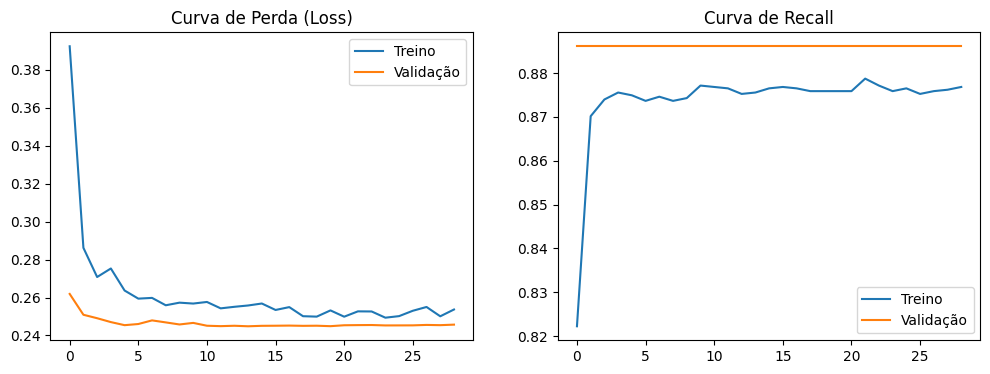

In [24]:
print("Iniciando treinamento...")
history = model.fit(
    X_train_scaled,
    y_train,              
    epochs=200,          
    batch_size=32,        
    validation_split=0.2, 
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Perda (Loss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Treino')
plt.plot(history.history['val_recall'], label='Validação')
plt.title('Curva de Recall')
plt.legend()

plt.show()

In [25]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1316
           1       0.95      0.87      0.91       987

    accuracy                           0.93      2303
   macro avg       0.93      0.92      0.92      2303
weighted avg       0.93      0.93      0.93      2303


Matriz de Confusão:
[[1273   43]
 [ 128  859]]


### Rede Neural (sem a coluna SOPRO)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import backend as K
from sklearn.model_selection import StratifiedKFold

X_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_train_sem_IMC_Z.csv')
y_train = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_train.csv').squeeze()
X_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/X_test_sem_IMC_Z.csv')
y_test = pd.read_csv(r'/Users/viniciustormin/02 Areas/UFG/MD/dataset/y_test.csv').squeeze()


colunas_sopro = [col for col in X_train.columns if 'sopro' in col.lower()]

print(f"Colunas sendo removidas: {colunas_sopro}")

if 'Motivo_Sopro' in colunas_sopro:
    colunas_sopro.remove('Motivo_Sopro')

print(f"Colunas sendo removidas: {colunas_sopro}")

X_train = X_train.drop(columns=colunas_sopro)
X_test = X_test.drop(columns=colunas_sopro)

# Verificação
print(f"\nColunas restantes: {X_train.shape[1]}")
print(X_train.columns.tolist())

Colunas sendo removidas: ['Motivo_Sopro', 'SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']
Colunas sendo removidas: ['SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']

Colunas restantes: 20
['IDADE', 'FC_Z_Score_Proxy', 'Sintoma_Dor', 'Sintoma_Cianose', 'Sintoma_Dispn', 'Checkup_Assintomatico', 'PPA_Alterada', 'Motivo_Cirurgia', 'Motivo_Sopro', 'Motivo_Congenita', 'B2_Desdobramento_Fixo', 'B2_Hiperfonetica', 'B2_Normal', 'B2_Outro', 'B2_Unica', 'IMC_Cat_Baixo', 'IMC_Cat_Normal', 'IMC_Cat_Obesidade', 'IMC_Cat_Sobrepeso', 'FC_Z']


In [27]:
print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste Final: {X_test.shape}")
print(f"Tamanho do y Treino: {y_train.shape}")

Tamanho do Treino: (9209, 20)
Tamanho do Teste Final: (2303, 20)
Tamanho do y Treino: (9209,)


In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
def criar_modelo_mlp(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = optimizers.Adam(learning_rate=0.001)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Recall(name='recall')]
    )
    return model

In [30]:
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

acc_per_fold = []
recall_per_fold = []

fold_no = 1

In [31]:
X = X_train.values 
y = y_train.values

In [32]:
print(f"Iniciando Cross-Validation com {k_folds} Folds...\n")

for train_index, val_index in skf.split(X, y): 
    
    
    K.clear_session()
    
    print(f'------------------------------------------------------------------------')
    print(f'Treinando Fold {fold_no} ...')

    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    model = criar_modelo_mlp(X_train_fold.shape[1])

    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )

    history = model.fit(
        X_train_fold, 
        y_train_fold,
        epochs=100, 
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold), 
        callbacks=[early_stopping],
        verbose=0 
    )

    
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    
    
    print(f'Score do Fold {fold_no}: Acurácia = {scores[1]:.4f} | Recall = {scores[2]:.4f}')
    
    acc_per_fold.append(scores[1])
    recall_per_fold.append(scores[2])

    fold_no += 1


print('\n------------------------------------------------------------------------')
print('RESULTADO FINAL DO CROSS-VALIDATION:')
print(f'Acurácia Média: {np.mean(acc_per_fold):.4f} (+/- {np.std(acc_per_fold):.4f})')
print(f'Recall Médio:   {np.mean(recall_per_fold):.4f} (+/- {np.std(recall_per_fold):.4f})')
print('------------------------------------------------------------------------')

Iniciando Cross-Validation com 5 Folds...

------------------------------------------------------------------------
Treinando Fold 1 ...
Score do Fold 1: Acurácia = 0.7030 | Recall = 0.4570
------------------------------------------------------------------------
Treinando Fold 2 ...
Score do Fold 2: Acurácia = 0.7025 | Recall = 0.4405
------------------------------------------------------------------------
Treinando Fold 3 ...
Score do Fold 3: Acurácia = 0.7090 | Recall = 0.4709
------------------------------------------------------------------------
Treinando Fold 4 ...
Score do Fold 4: Acurácia = 0.7193 | Recall = 0.4595
------------------------------------------------------------------------
Treinando Fold 5 ...
Score do Fold 5: Acurácia = 0.7197 | Recall = 0.4804

------------------------------------------------------------------------
RESULTADO FINAL DO CROSS-VALIDATION:
Acurácia Média: 0.7107 (+/- 0.0075)
Recall Médio:   0.4616 (+/- 0.0135)
---------------------------------------

In [33]:
print("--- Iniciando Treinamento do Modelo FINAL (Full Dataset) ---")


final_scaler = StandardScaler()
X_train_final = final_scaler.fit_transform(X_train.values) 
y_train_final = y_train.values 


X_test_final = final_scaler.transform(X_test.values) 


model_final = criar_modelo_mlp(X_train_final.shape[1])


early_stopping_final = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True
)

history_final = model_final.fit(
    X_train_final, 
    y_train_final,
    epochs=200,          
    batch_size=32,       
    validation_data=(X_test_final, y_test), 
    callbacks=[early_stopping_final],
    verbose=1
)

print("\n--- Relatório Final no Conjunto de Teste (Hold-Out) ---")
y_pred_prob = model_final.predict(X_test_final)
y_pred = (y_pred_prob > 0.4).astype(int) 

print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))
print("Matriz de Confusão Final:")
print(confusion_matrix(y_test, y_pred))

--- Iniciando Treinamento do Modelo FINAL (Full Dataset) ---
Epoch 1/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6418 - loss: 0.6676 - recall: 0.5503 - val_accuracy: 0.7152 - val_loss: 0.5718 - val_recall: 0.5623
Epoch 2/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.6870 - loss: 0.6068 - recall: 0.5315 - val_accuracy: 0.7169 - val_loss: 0.5654 - val_recall: 0.5096
Epoch 3/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.6958 - loss: 0.5954 - recall: 0.5196 - val_accuracy: 0.7178 - val_loss: 0.5623 - val_recall: 0.5400
Epoch 4/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6951 - loss: 0.5857 - recall: 0.5179 - val_accuracy: 0.7160 - val_loss: 0.5603 - val_recall: 0.5795
Epoch 5/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7016 - loss: 0.5827 - recall: 0.5292 - val_accuracy: 0.7186 - val_loss: 0.5588 - val_recall: 0.5623
Epoch 6/200
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7002 - loss: 0.5803 - recal